[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Computational_Statistics/blob/main/8/W8a.ipynb)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats

# MSE estimation of Trimmed Mean

In [21]:
def trimmed_mean(array:np.ndarray, trim = 1)->tuple:
    array.sort()
    trimmed_array = array[trim:-trim]
    return trimmed_array.mean(), trimmed_array.std()

In [63]:
### How to approximate MSE error of trimmed mean?
def mse_of_trimmed_mean(n_samples):
    victims = np.array([trimmed_mean(np.random.randn(1000), 3)[0] for _ in range(n_samples)])
    return np.mean(victims**2)

In [64]:
mse_of_trimmed_mean(100000)

0.0009958948250343494

In [31]:
## Remember how to find confidence interval, this is important!!!!
stats.norm.interval(0.95, 0, 1)  ### remember confidence interval....

(-1.959963984540054, 1.959963984540054)

# Confidence Interval Check

In [251]:
def test(n_samples = 10000, conf = 0.95, sample_size = 10000):
  L = 0
  for _ in range(n_samples):
    sample = np.random.randn(sample_size)
    mean = sample.mean()
    std = sample.std(ddof = 1)
    INT = stats.norm.interval(conf, mean, std/sample_size**0.5)  ### we had a mistake last week here!!!!
    if not (INT[0] < 0 and INT[1] > 0):
      L += 1
  return (n_samples - L)/n_samples

In [252]:
test(conf = 0.99, n_samples = 10000, sample_size = 100)

0.987

# Estimating a Confidence Level
Assume that you sample from a population with unknown mean. Someone comes in claims that the true population mean is 13.8, and this dude appears to be pretty confident in his claim. How do you confirm this?
Assume that you are sampling from $\chi^2(14)$ distribution.


In [253]:
rv = stats.chi2(14)

In [262]:
def empirical_confidence_level(random_variable, claimed_mean = 13.8, n_sample = 10000, sample_size = 100):
    L = 0
    for i in range(n_sample):
        sample = random_variable.rvs(sample_size)
        mean = sample.mean()
        std = sample.std(ddof = 1)
        INT = stats.norm.interval(0.95, mean, std/sample_size**0.5)
        if INT[0] < claimed_mean and claimed_mean < INT[1]:
          L += 1   
    return L/n_sample

In [263]:
empirical_confidence_level(rv)

0.9418

# Confidence Interval for Variance

In [ ]:
### This is your job!!!! 

## How do we perform hypothesis testing in Python?
See https://docs.scipy.org/doc/scipy/reference/stats.html

In [154]:
## scipy.stats.ttest_1samp for population mean
stats.ttest_1samp(np.random.randn(20)+500, 500, alternative= "greater") ### H_0 is not rejected!!!!

Ttest_1sampResult(statistic=-0.40684136341459265, pvalue=0.6556644778065253)

In [150]:
### Do some examples here!!! with hypothesis tests!!! Such as normality vs vs

# Empirical Type I Error Rate

In [155]:
def empiricalI():
    L = 0
    for i in range(10000):
        if stats.ttest_1samp(10*np.random.randn(20)+500, 500, alternative= "greater").pvalue < 0.05:
            L += 1
    prop = L/10000
    return prop, (prop*(1-prop)/10000)**0.5
empiricalI()

(0.051, 0.0021999772726098788)

# Empirical Type II Error Rate

In [186]:
def __empiricalII__(θ, n_sample = 10000):
    L = 0
    for i in range(n_sample):
        if stats.ttest_1samp(100*np.random.randn(20)+500, θ, alternative= "greater").pvalue < 0.05:
            L += 1
    prop = L/n_sample
    return prop, (prop*(1-prop)/n_sample)**0.5

__empiricalII__(θ = 500)



(0.0518, 0.00221623013245466)

In [195]:
X = range(400, 650, 10)
Y = [1- __empiricalII__(θ)[0] for θ in X]

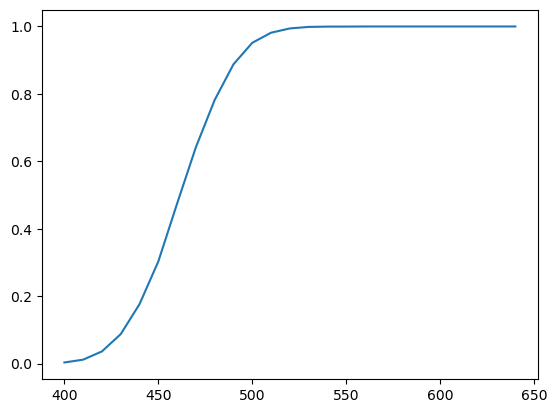

In [196]:
plt.plot(X, Y)